# Results

In [102]:
using AlgebraOfGraphics
using AlgebraOfGraphics: density
using CairoMakie
using DataFrames
using DataFramesMeta
using Arrow
using PartialFunctions

set_aog_theme!()

In [103]:
include("utils.jl")

draw! (generic function with 2 methods)

In [104]:
function load(path::String)
    df = path |> Arrow.Table |> DataFrame |> dropmissing

    # Iterate through each column in the DataFrame
    filter(row -> all(x -> !(x isa Number && isnan(x)), row), df)
end

begin
    enc = "enc2" # event id (encounter id)
    psp_p_instr = "spc_n_spc"
    dir = "../data"
    fig_dir = "../figures"
    fmt = "arrow"

    path01 = "$dir/$enc/psp_ids_ds_$(psp_p_instr).$fmt"
    path02 = "$dir/$enc/thm_ids_ds.$fmt"
    path03 = "$dir/$enc/wind_ids_ds.$fmt"

    psp_df = load(path01)
    thm_df = load(path02)
    wind_df = load(path03)

    # path02 = "$dir/psp_ids_dataset_$(enc)_$(psp_p_instr)_r.$fmt"
    # psp_df_r = load(path02)

    mkpath("$fig_dir/$enc")
end
# psp_df = Dataset("../data/psp_ids_dataset.parquet")

"../figures/enc2"

In [139]:
function process(df)
    @chain df begin
        @transform(
            :"B.mean" = (:"B.before" .+ :"B.after") ./ 2,
            :"n.mean" = (:"n.before" .+ :"n.after") ./ 2,
            :"T.mean" = (:"T.before" .+ :"T.after") ./ 2,
        )
        @transform(
            :"v.Alfven.change.l" = abs.(:"v.Alfven.change.l"),
            :"v.ion.change.l" = abs.(:"v.ion.change.l")
        )
        @transform :Λ_t = 1 .- (:"v.ion.change.l" ./ :"v.Alfven.change.l") .^ 2
    end
end

begin
    # concat dataframe with add column dataset to identify the dataset
    psp_df[!, :dataset] .= "Parker Solar Probe"
    wind_df[!, :dataset] .= "Wind"
    thm_df[!, :dataset] .= "ARTEMIS"

    psp_df = process(psp_df)
    thm_df = process(thm_df)
    wind_df = process(wind_df)

    df = reduce(
        vcat,
        [psp_df, thm_df, wind_df],
        cols=:intersect
    )

    earth_df = reduce(
        vcat,
        [thm_df, wind_df],
        cols=:intersect
    )
    # psp_df_r[!, :dataset] .= "PSP (Low Res)"
    # process!(psp_df_r)
    # df = vcat(psp_df, psp_df_r, wind_df, cols=:intersect)
end

865×95 DataFrame
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2019-04-09T12:30:30  2019-04-09T12:30:15  2019-04-09T12:30:45  2019-04- ⋯
   2 │ 2019-04-09T12:33:00  2019-04-09T12:32:45  2019-04-09T12:33:15  2019-04-
   3 │ 2019-04-09T12:34:00  2019-04-09T12:33:45  2019-04-09T12:34:15  2019-04-
   4 │ 2019-04-09T12:41:45  2019-04-09T12:41:30  2019-04-09T12:42:00  2019-04-
   5 │ 2019-04-09T12:42:00  2019-04-09T12:41:45  2019-04-09T12:42:15  2019-04- ⋯
   6 │ 2019-04-09T12:57:15  2019-04-09T12:57:00  2019-04-09T12:57:30  2019-04-
   7 │ 2019-04-09T13:01:45  2019-04-09T13:01:30  2019-04-09T13:02:00  2019-04-
   8 │ 2019-04-09T13:02:00  2019-04-09T13:01:45  2019-04-09T13:02:15  2019-04-
  ⋮  │          ⋮                    ⋮                    ⋮                    ⋱
 859 │ 2019-04-11T23:07:30  2019-04-11T23:07:15  2019-04-11T23:07:45  2019-04- ⋯
 860 │ 2019-04-11T23:09:30  2019-04-11T23:09:15  2019-04-11T23:09:45  2019-04-
 861 │ 2019-04-11T23:14:30  2019-04-11T23:14:15  2019-04-11T23:14:45  2019-04-
 862 │ 2019-04-11T23:17:30  2019-04-11T23:17:15  2019-04-11T23:17:45  2019-04-
 863 │ 2019-04-11T23:32:00  2019-04-11T23:31:45  2019-04-11T23:32:15  2019-04- ⋯
 864 │ 2019-04-11T23:51:15  2019-04-11T23:51:00  2019-04-11T23:51:30  2019-04-
 865 │ 2019-04-11T23:53:00  2019-04-11T23:52:45  2019-04-11T23:53:15  2019-04-
                                                 92 columns and 850 rows omitted

In [119]:
# data_layer_a = data(df) * mapping(color=:dataset, marker=:dataset, alpha=:alpha)
data_layer_a = (
    data(psp_df) * visual(alpha=1) + (data(wind_df) + data(thm_df)) * visual(alpha=0.2)
) * mapping(
    color=:dataset,
    marker=:dataset
)

data_layer_b = (
    (data(wind_df) + data(thm_df))
) * mapping(
    color=:dataset,
    marker=:dataset
)

Layers(Layer[Layer(identity, 667×104 DataFrameColumns
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2019-04-09T00:04:00  2019-04-09T00:03:45  2019-04-09T00:04:15  2019-04- ⋯
   2 │ 2019-04-09T00:04:15  2019-04-09T00:04:00  2019-04-09T00:04:30  2019-04-
   3 │ 2019-04-09T00:05:15  2019-04-09T00:05:00  2019-04-09T00:05:30  2019-04-
   4 │ 2019-04-09T00:05:30  2019-04-09T00:05:15  2019-04-09T00:05:45  2019-04-
   5 │ 2019-04-09T00:40:00  2019-04-09T00:39:45  2019-04-09T00:40:15  2019-04- ⋯
   6 │ 2019-04-09T01:01:15  2019-04-09T01:01:00  2019-04-09T01:01:30  2019-04-
   7 │ 2019-04-09T01:01:30  2019-04-09T01:01:15  2019-04-09T01:01:45  2019-04-
   8 │ 2019-04-09T01:07:00  2019-04-09T01:06:45  2019-04-09T01:07:15  2019-04-
  ⋮  │          ⋮                    ⋮                    ⋮        

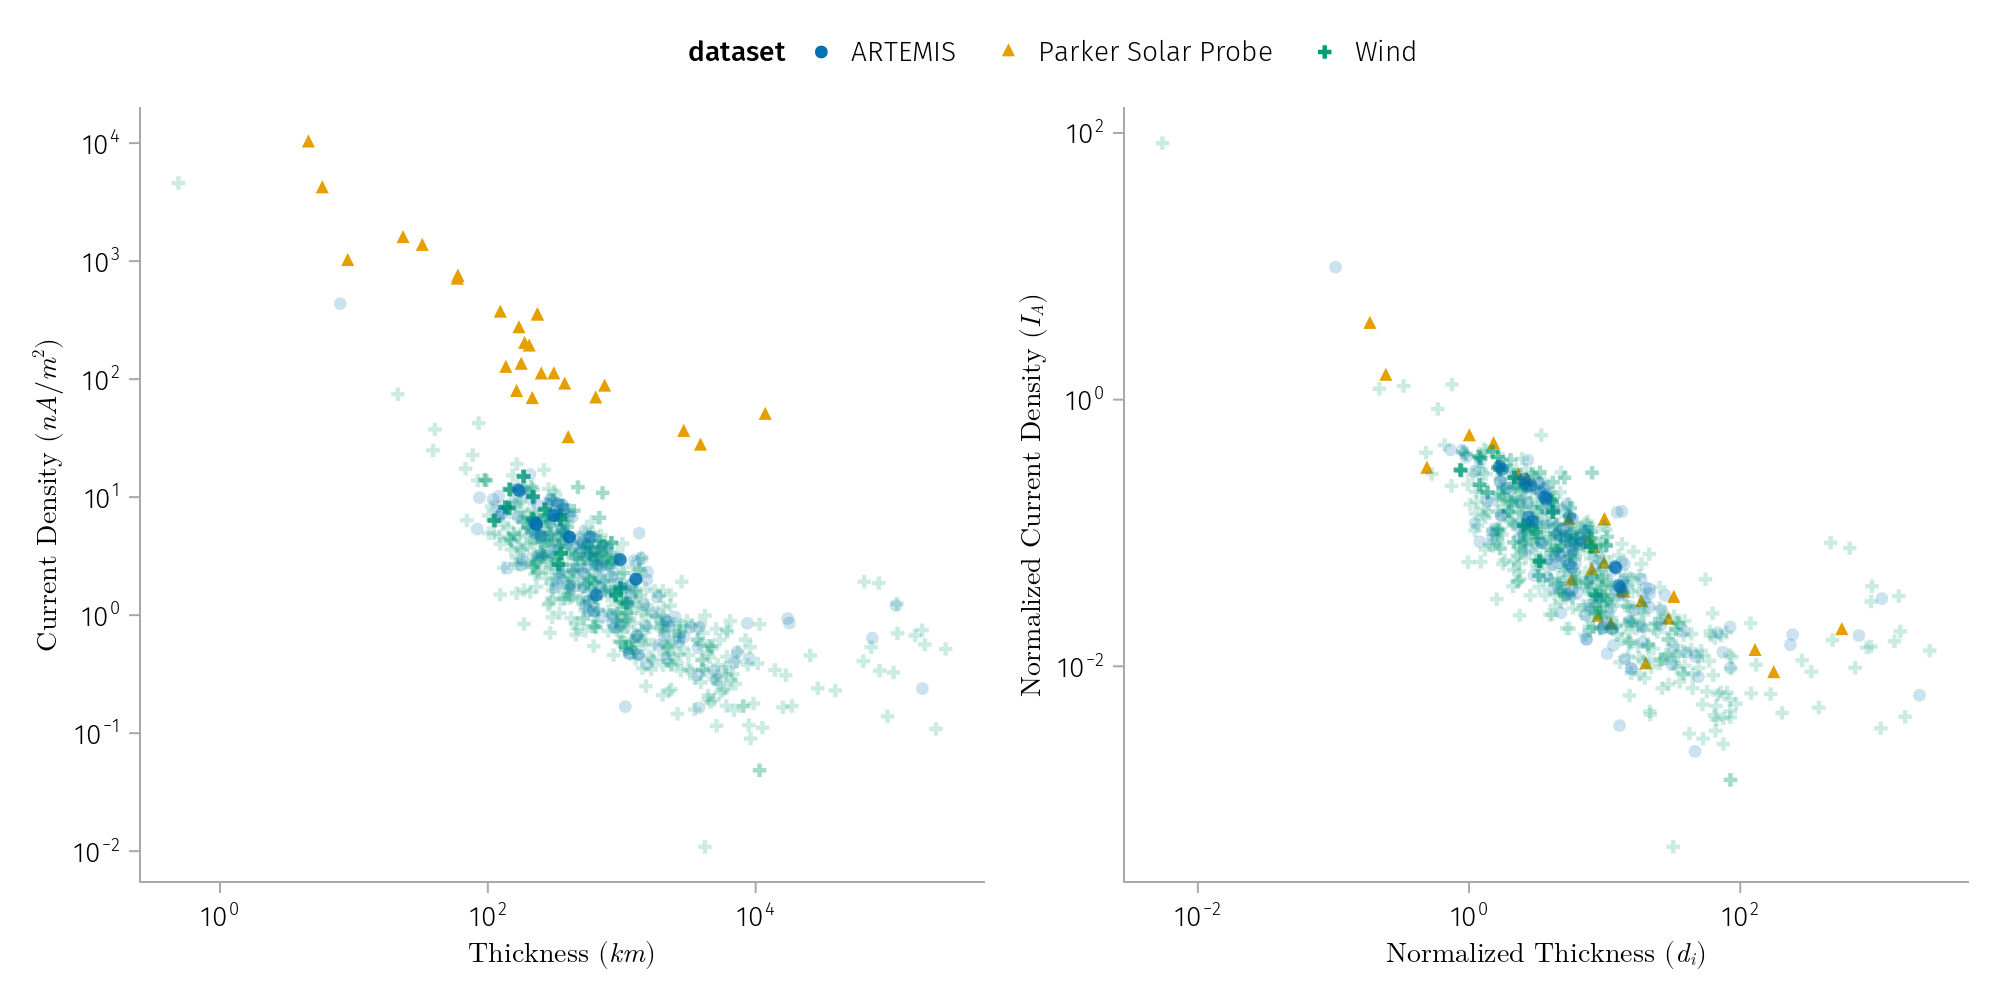

In [107]:
begin
    j_label = L"Current Density ($nA/m^2$)"
    j_norm_label = L"Normalized Current Density ($I_A$)"
    l_label = L"Thickness ($km$)"
    l_norm_label = L"Normalized Thickness ($d_i$)"

    thickness_map = :L_k => l_label
    thickness_norm_map = :L_k_norm => abs => l_norm_label
    current_map = :j0_k => abs => j_label
    current_norm_map = :j0_k_norm => abs => j_norm_label

    # data_layer_a = (data(psp_df) + data(psp_df_r) * visual(alpha=0.6) + data(wind_df) * visual(alpha=0.3)) * mapping(color=:dataset, marker=:dataset)
    plt = data_layer_a * visual(Scatter)

    fig = Figure(size=(1000, 500))
    axis = log_axis

    grid1 = plt * mapping(thickness_map, current_map) |> draw!(fig[2, 1]; axis=axis)
    grid2 = plt * mapping(thickness_norm_map, current_norm_map) |> draw!(fig[2, 2]; axis=axis)

    pretty_legend!(fig, grid1)
    # easy_save("thickness_current_$psp_p_instr")

    fig
end

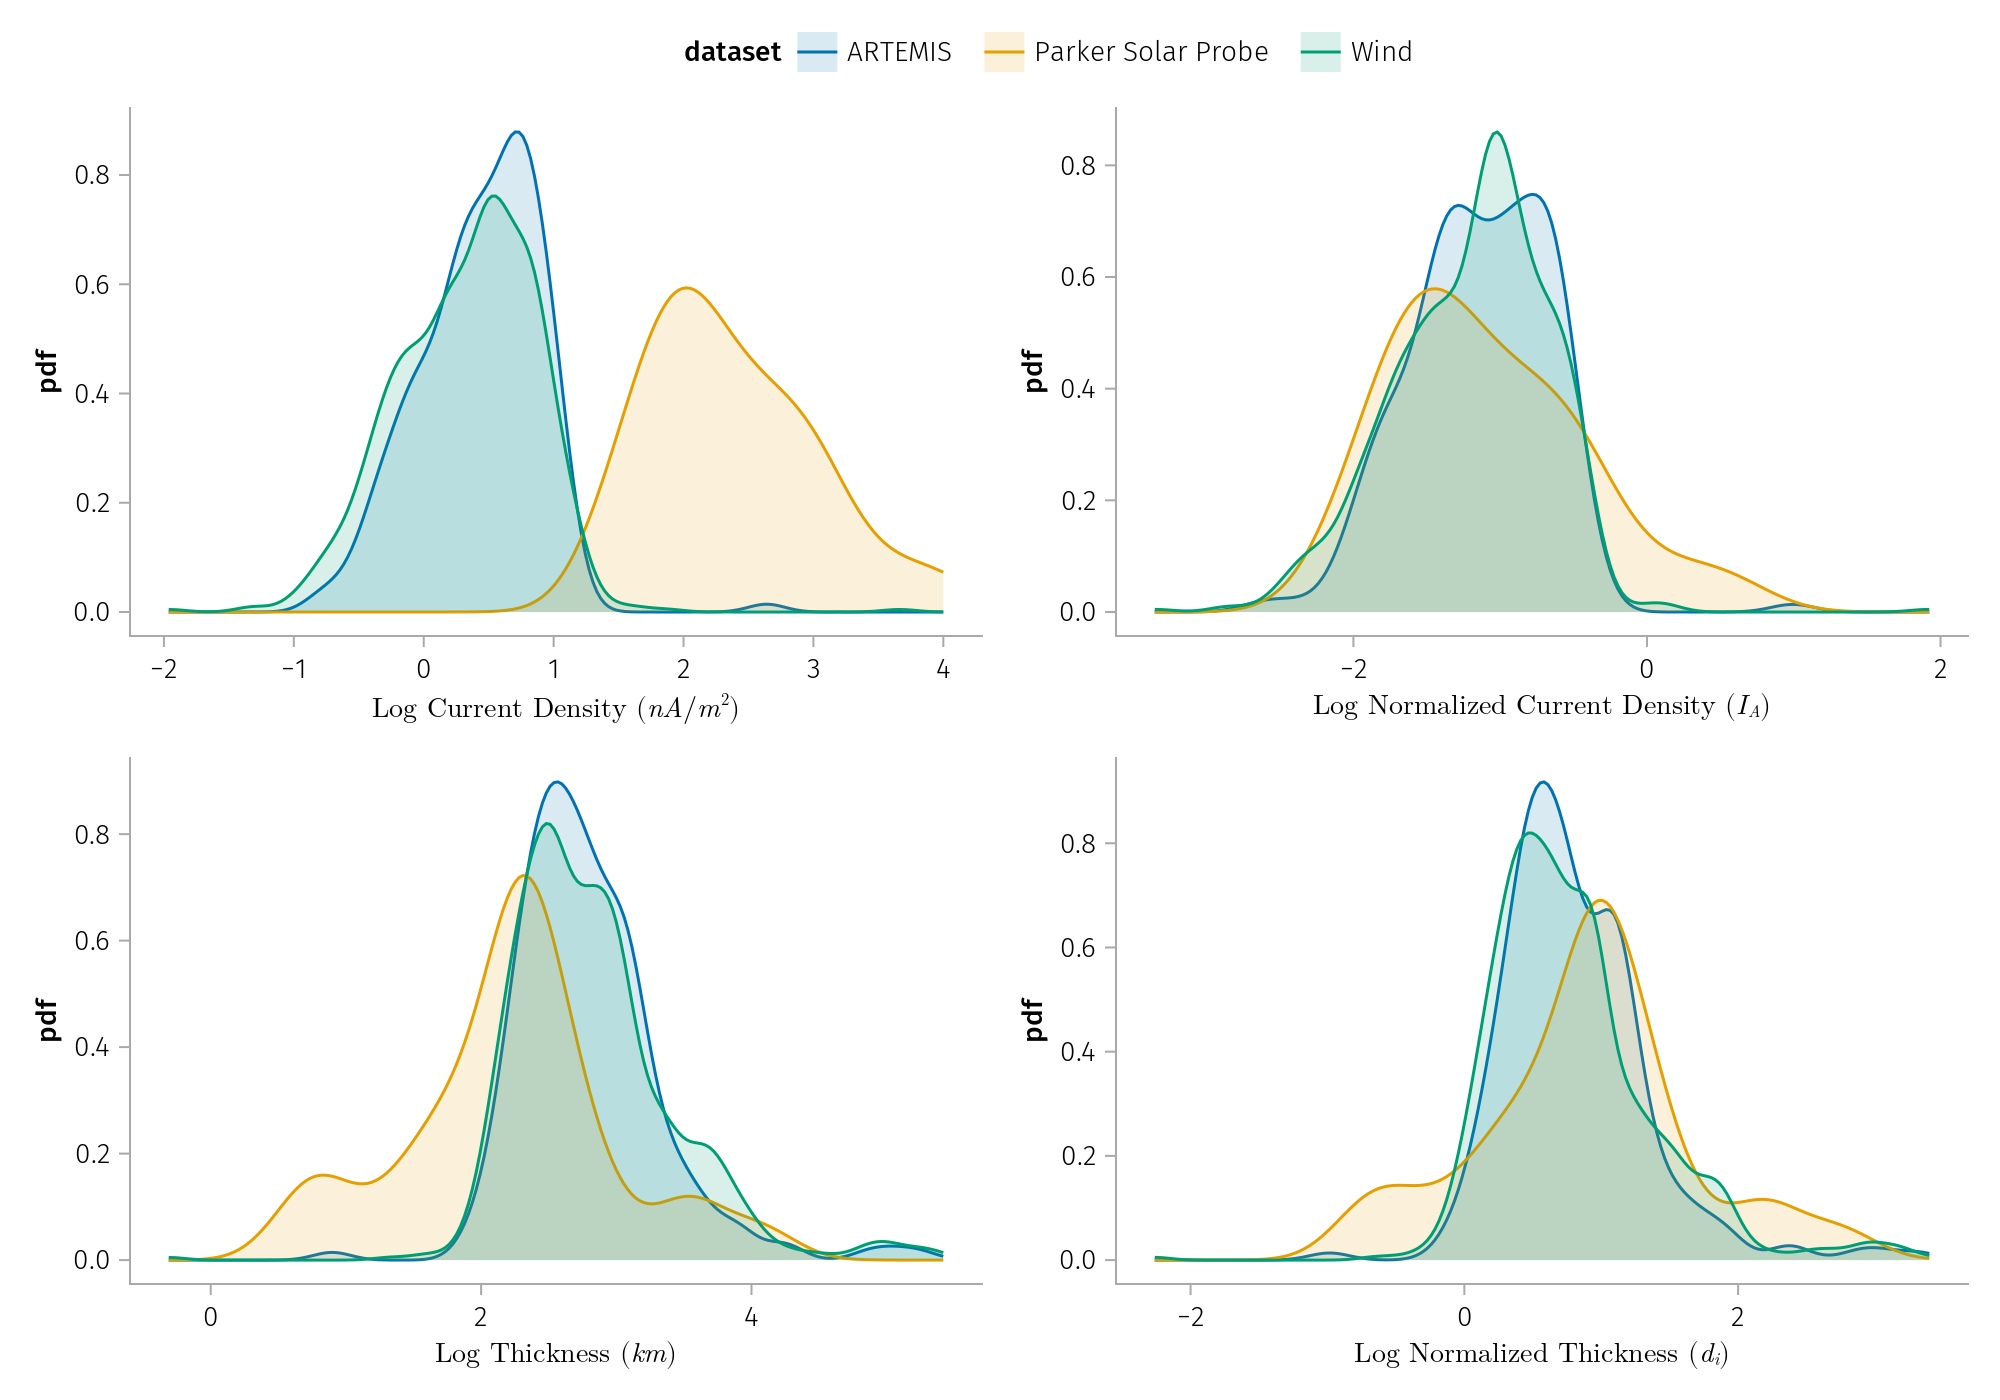

In [108]:
# plot the density distribution of the thickness and current density
begin
    fname = "density_distribution"

    data_layer = data(df) * mapping(color=:dataset, marker=:dataset)
    plt = data_layer * density()

    fig = Figure(size=(1000, 700))
    mapping_layer_j = mapping(:j0_k => log10 ∘ abs => L"Log %$(j_label)")
    mapping_layer_j_norm = mapping(:j0_k_norm => log10 ∘ abs => L"Log %$(j_norm_label)")

    mapping_layer_l = mapping(:L_k => log10 ∘ abs => L"Log %$(l_label)")
    mapping_layer_l_norm = mapping(:L_k_norm => log10 ∘ abs => L"Log %$(l_norm_label)")

    grid = draw!(fig[2, 1], plt * mapping_layer_j)
    plt * mapping_layer_j_norm |> draw!(fig[2, 2])
    plt * mapping_layer_l |> draw!(fig[3, 1])
    plt * mapping_layer_l_norm |> draw!(fig[3, 2])

    pretty_legend!(fig, grid)

    easy_save("$(fname)_$psp_p_instr")

    fig

end

In [109]:
dn_over_n = ("n.change", "n.mean") => (/) => L"\Delta n/n"
dB_over_B = ("B.change", "b_mag") => (/) => L"\Delta B/B"
dT_over_T = ("T.change", "T.mean") => (/) => L"\Delta T/T"

("T.change", "T.mean") => ((/) => L"$\Delta T/T$")

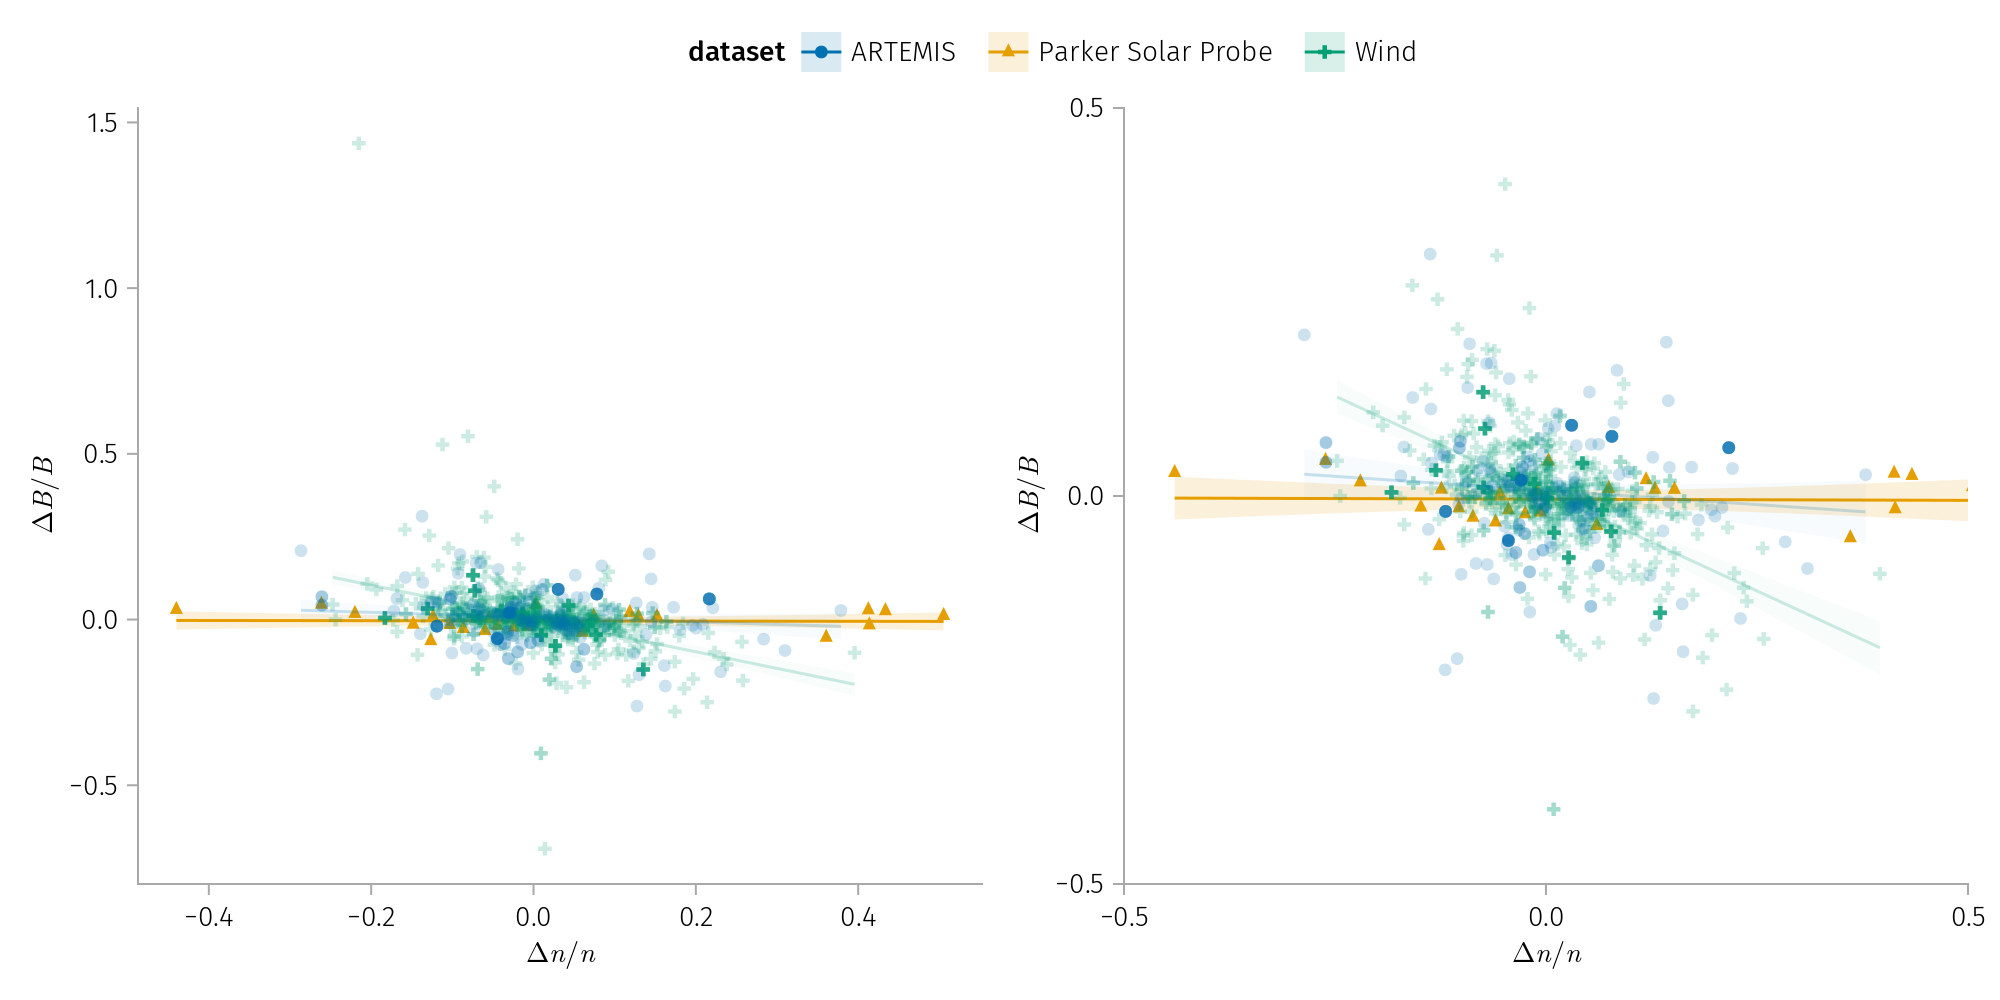

In [110]:
#| label: fig-dn-dB
#| column: screen
begin
    fname = "dn-dB"
    plt = data_layer_a * mapping(dn_over_n, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[2, 1])
    grid2 = plt |> draw!(fig[2, 2], axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    
    pretty_legend!(fig, grid1)
    easy_save("$(fname)_$psp_p_instr")

    fig
end

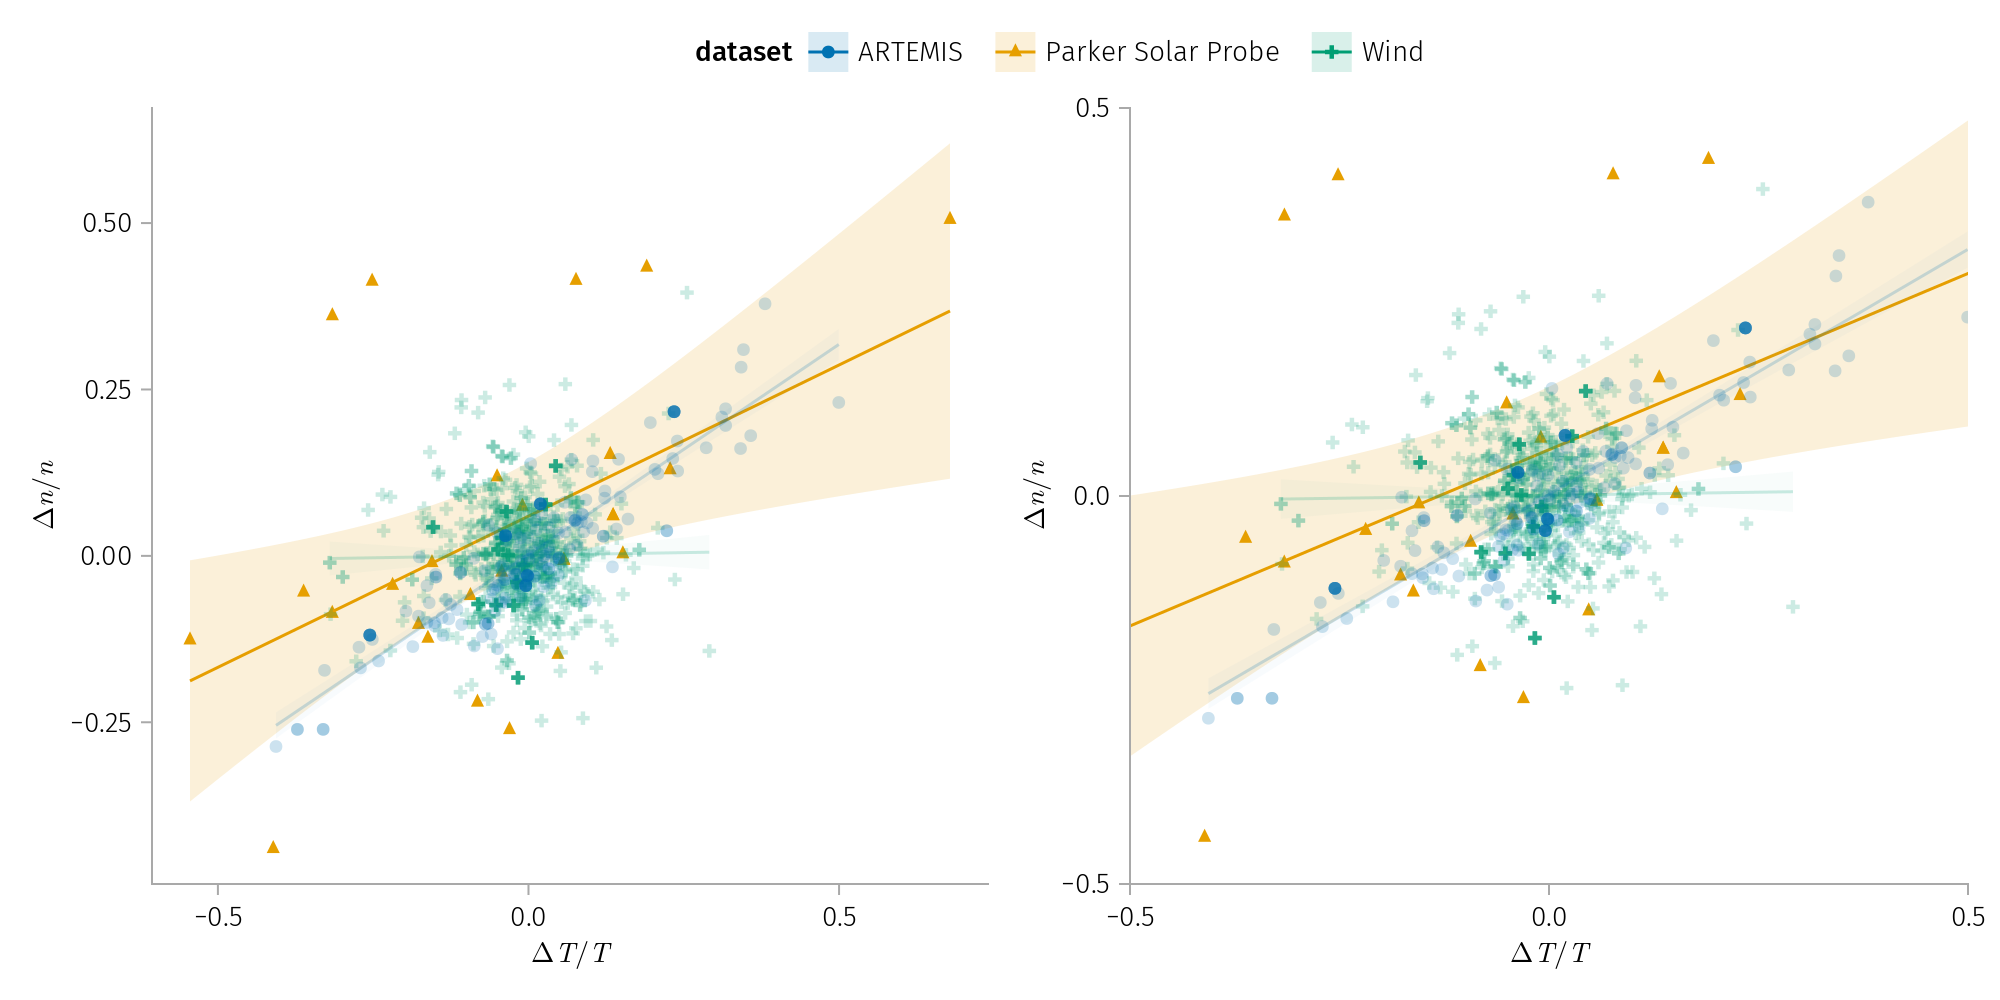

In [111]:
#| label: fig-dn-dT
#| column: screen
begin
    fname = "dn-dT"
    plt = data_layer_a * mapping(dT_over_T, dn_over_n) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[2, 1])
    grid2 = plt |> draw!(fig[2, 2]; axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))

    pretty_legend!(fig, grid1)
    easy_save("$(fname)_$psp_p_instr")

    fig
end

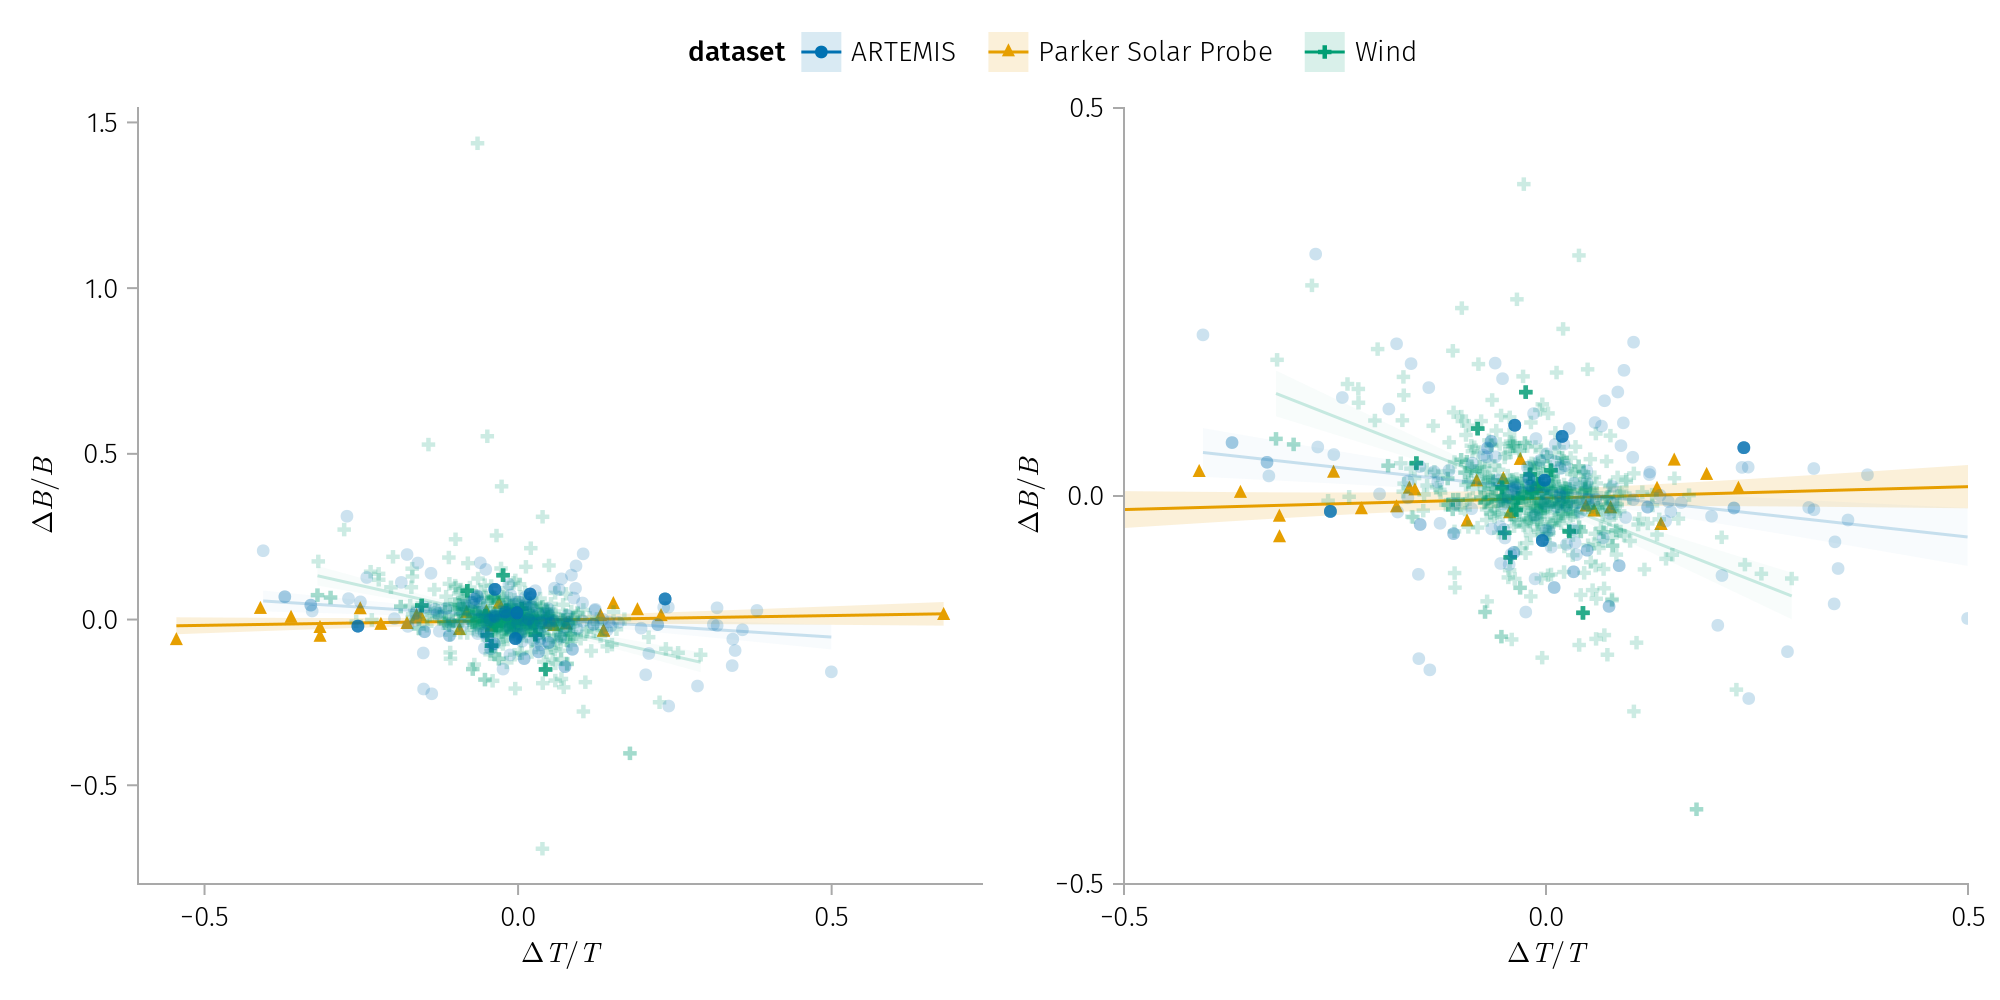

In [112]:
#| label: fig-dT-dB
#| column: screen
begin
    fname = "dT-dB"
    plt = data_layer_a * mapping(dT_over_T, dB_over_B) * (linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid = draw!(fig[2, 1], plt)
    draw!(fig[2, 2], plt, axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)

    easy_save("$(fname)_$psp_p_instr")

    fig
end

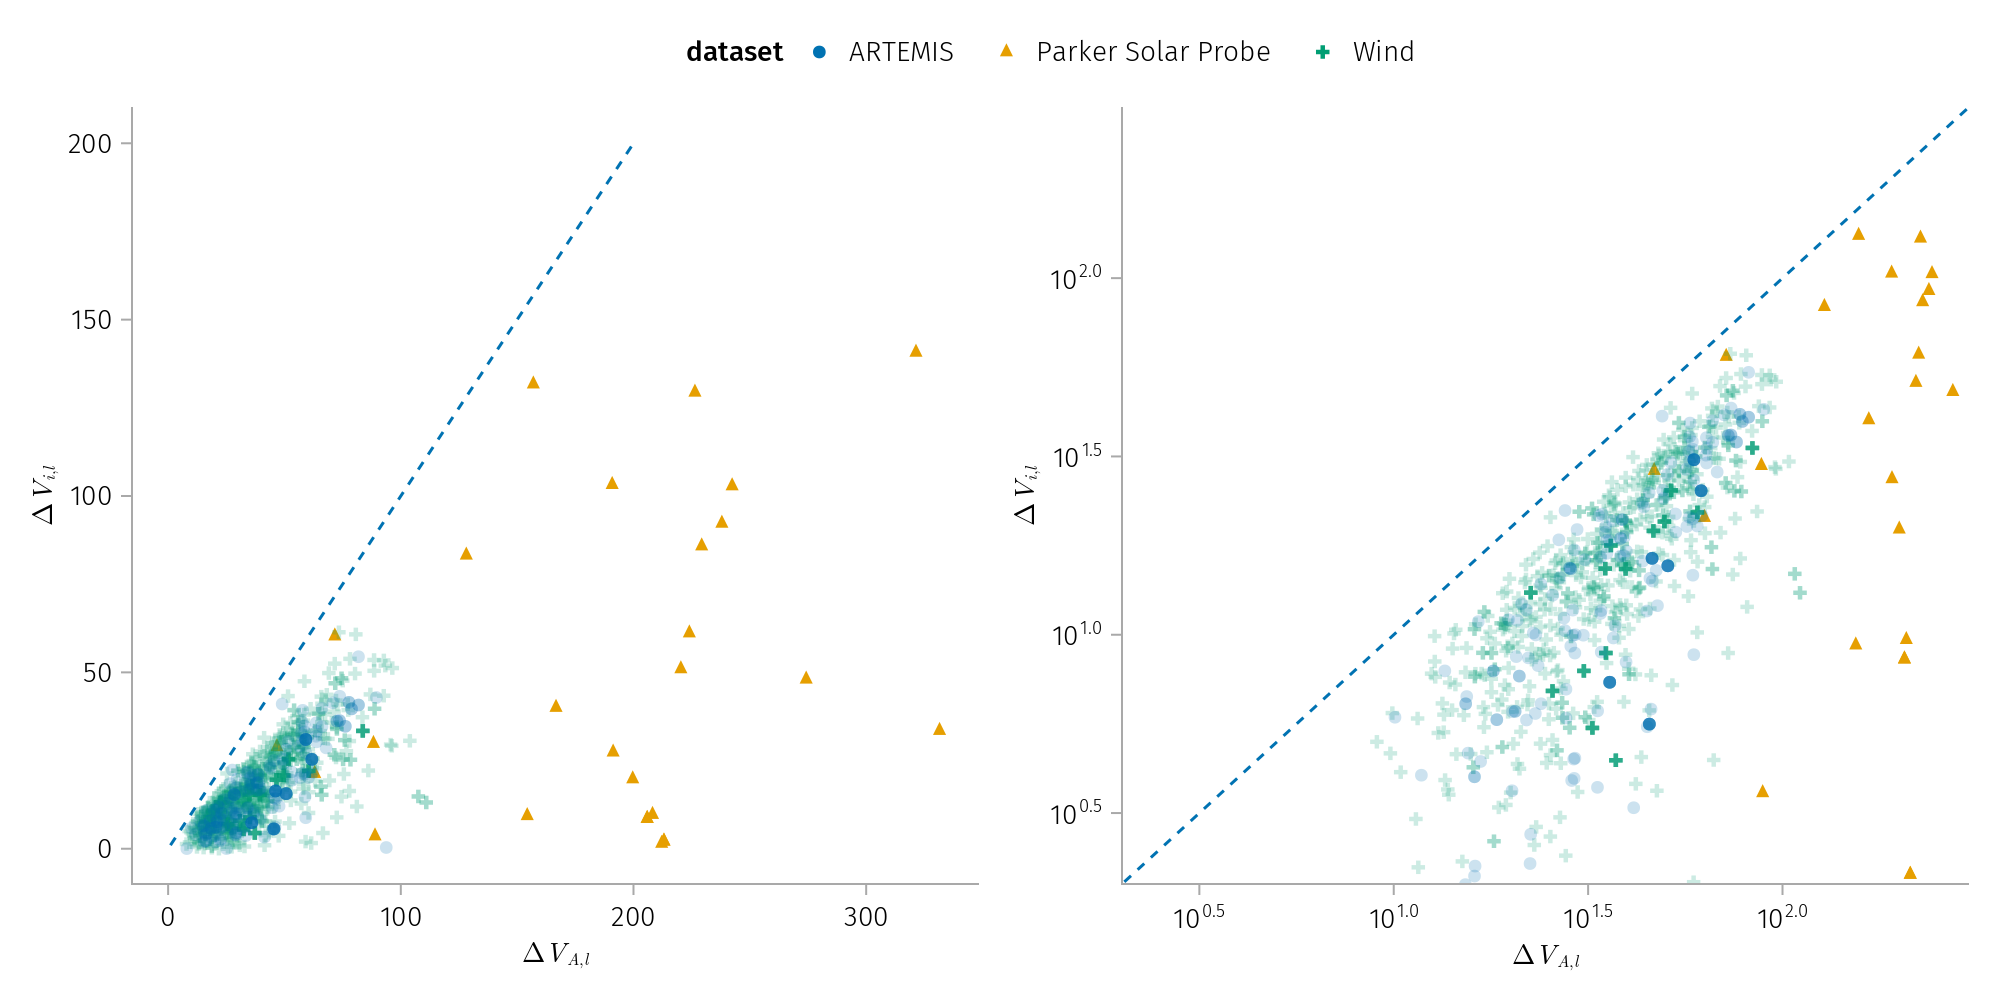

In [116]:
#| label: fig-dvl
#| column: screen
begin
    fname = "dvl"

    v_Alfven_map = "v.Alfven.change.l" => L"\Delta V_{A,l}"
    v_ion_map = "v.ion.change.l" => L"\Delta V_{i,l}"

    # plt = data_layer_a * mapping(v_Alfven_map, v_ion_map) * (linear(interval=nothing) + mapping())
    plt = data_layer_a * mapping(v_Alfven_map, v_ion_map)

    fig = Figure(size=(1000, 500))

    limit_axis = (; limits=((2, 300), (2, 300)))
    axis = merge(log_axis, limit_axis)

    grid1 = plt |> draw!(fig[2, 1])
    lines!(1 .. 200, identity, linestyle=:dash) # add a dashed line with slope 1
    grid2 = plt |> draw!(fig[2, 2]; axis=axis)
    lines!(1 .. 1000, identity, linestyle=:dash) # add a dashed line with slope 1

    pretty_legend!(fig, grid1)

    easy_save("$(fname)_$psp_p_instr")

    fig
end

## Anistropy

In [135]:
function plot_anistropy()
    fname = "anisotropy"

    Λ_t_map = :Λ_t => L"\Lambda_{theory}"

    plt = data_layer_a * mapping(Λ_t_map)

    fig = Figure(size=(1000, 500))
    grid1 = plt * density() |> draw!$fig[2, 1]
    grid2 = plt * histogram() |> draw!$fig[2, 2]

    # easy_save("$(fname)_$psp_p_instr")
    # legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    pretty_legend!(fig, grid1)

    fig
end

plot_anistropy (generic function with 1 method)

In [182]:
using Pkg
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [183]:
using LaTeXStrings

In [211]:
Λ_t_map = :Λ_t => L"\Lambda_{theory}"
Λ_ion_map = :Λ_ion => L"\Lambda_i"
Λ_e_map = :Λ_e => L"\Lambda_e"
Λ_map = :Λ => L"\Lambda"

:Λ => L"$\Lambda$"

In [249]:
function plot_anistropy_comparison()
    fname = "anisotropy_comparison"

    fig = Figure(size=(1000, 800))

    plt_Λ = data(
        stack(earth_df, [:Λ, :Λ_t, :Λ_ion, :Λ_e], [:time, :dataset])
    ) * mapping(:value => L"\Lambda", color=:variable, marker=:variable, col=:dataset)

    grid1 = plt_Λ * density() |> draw!$fig[2, 1:2]
    grid2 = plt_Λ * histogram() |> draw!$fig[3, 1:2]
    # easy_save("$(fname)_$psp_p_instr")
    # legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    pretty_legend!(fig, grid1)

    fig
end

function plot_anistropy_comparison_2d()
    fname = "anisotropy_comparison_2d"

    temp_df = @chain begin
        stack(earth_df, [:Λ, :Λ_ion, :Λ_e], [:time, :dataset, :Λ_t])
        @transform(:variable = :variable)
    end

    fig = Figure(size=(1000, 800))

    mapping_layer = mapping(Λ_t_map, :value => L"\Lambda")

    plt1 = data(
        temp_df
    ) * mapping(
        row=:variable => latexstring, col=:dataset,
        color=:dataset, marker=:dataset,
    )

    # draw a dashed line with slope 1
    df2 = (Λ_t=[0, 1], value=[0, 1])
    plt2 = data(df2) * visual(Lines)

    plt = (plt1 + plt2) * mapping_layer

    grid1 = draw!(fig[1:3, 1:2], plt, facet=(; linkxaxes=:minimal, linkyaxes=:none))

    fig
end

function plot_anistropy_comparison_i_e()
    fname = "anisotropy_comparison_i_e"

    mapping_layer = mapping(
        Λ_e_map, Λ_ion_map,
    )

    # draw a dashed line with slope 1
    df2 = (Λ_e=[0, 0.3], Λ_ion=[0, 0.3])

    plt = (data(earth_df) * mapping(row=:dataset) + data(df2) * visual(Lines)) * mapping_layer

    fig = draw(plt, facet=(; linkxaxes=:minimal, linkyaxes=:minimal))
    fig
end

plot_anistropy_comparison_i_e (generic function with 1 method)

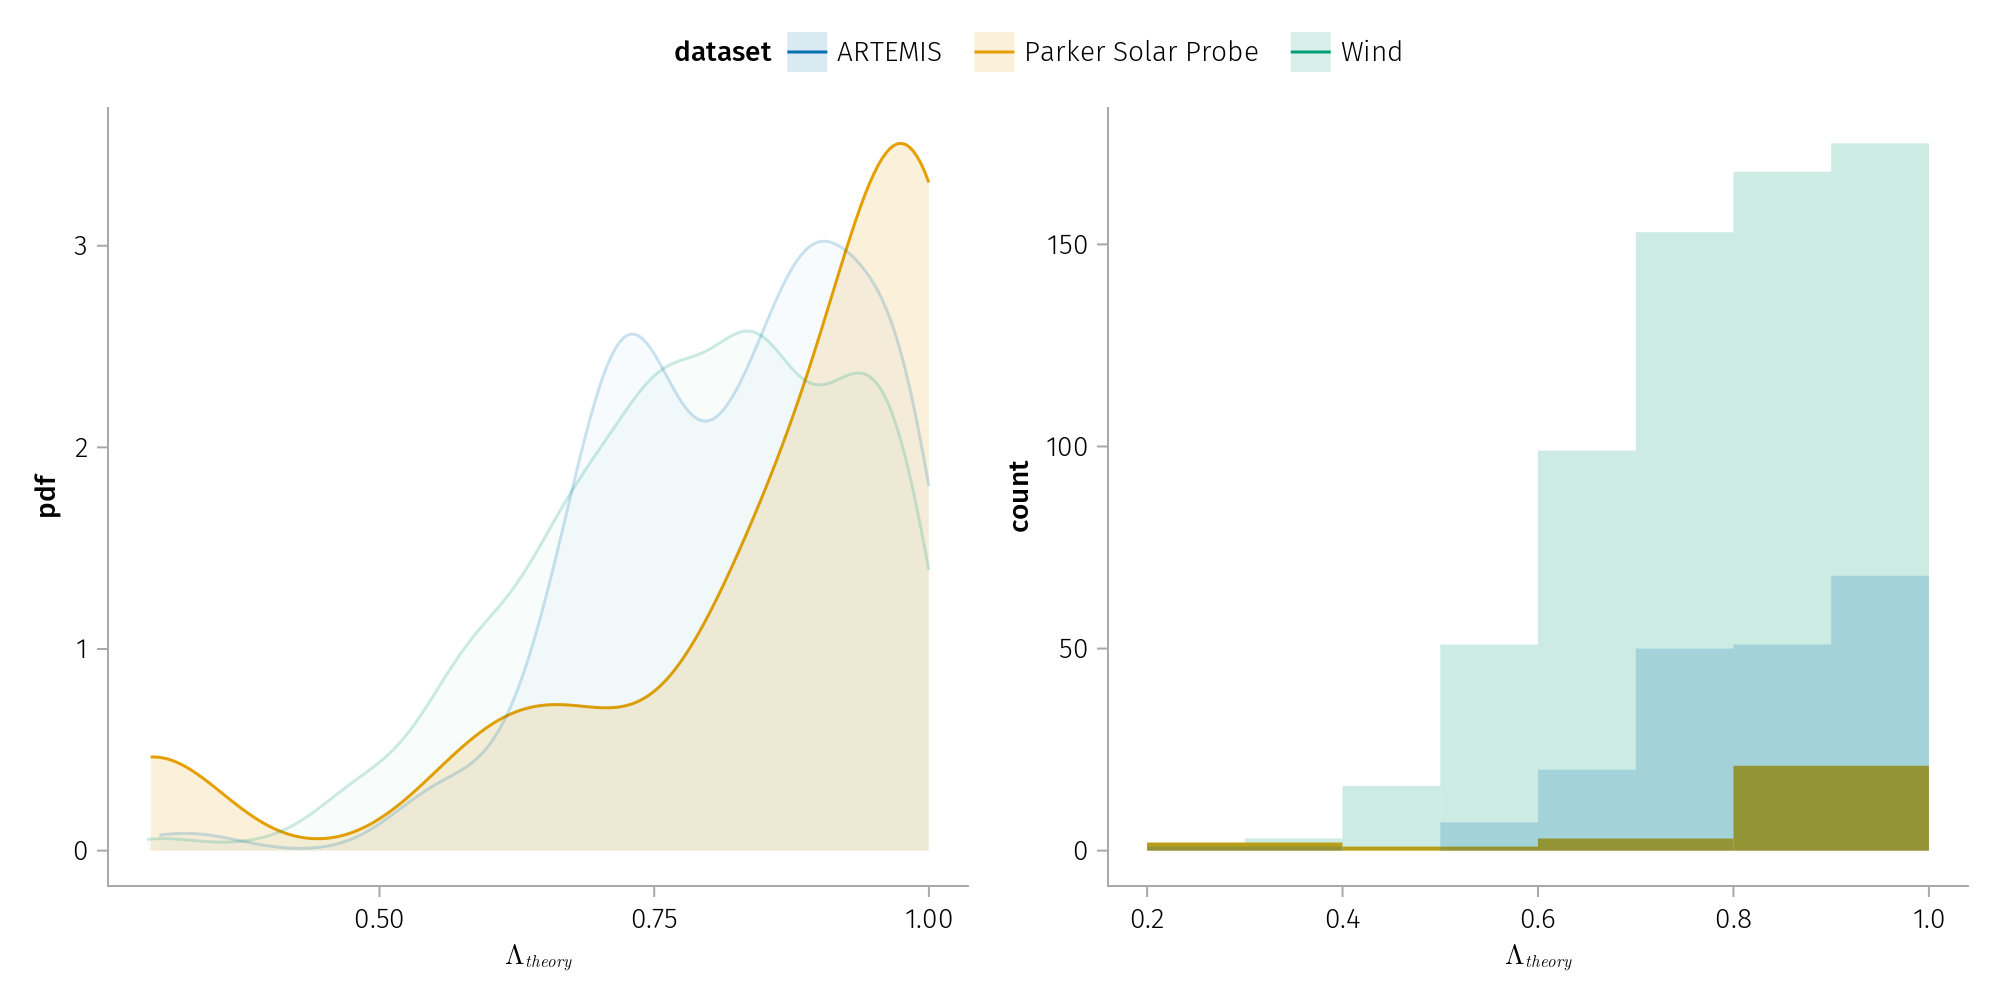

In [136]:
#| label: fig-anisotropy
#| column: screen
plot_anistropy()

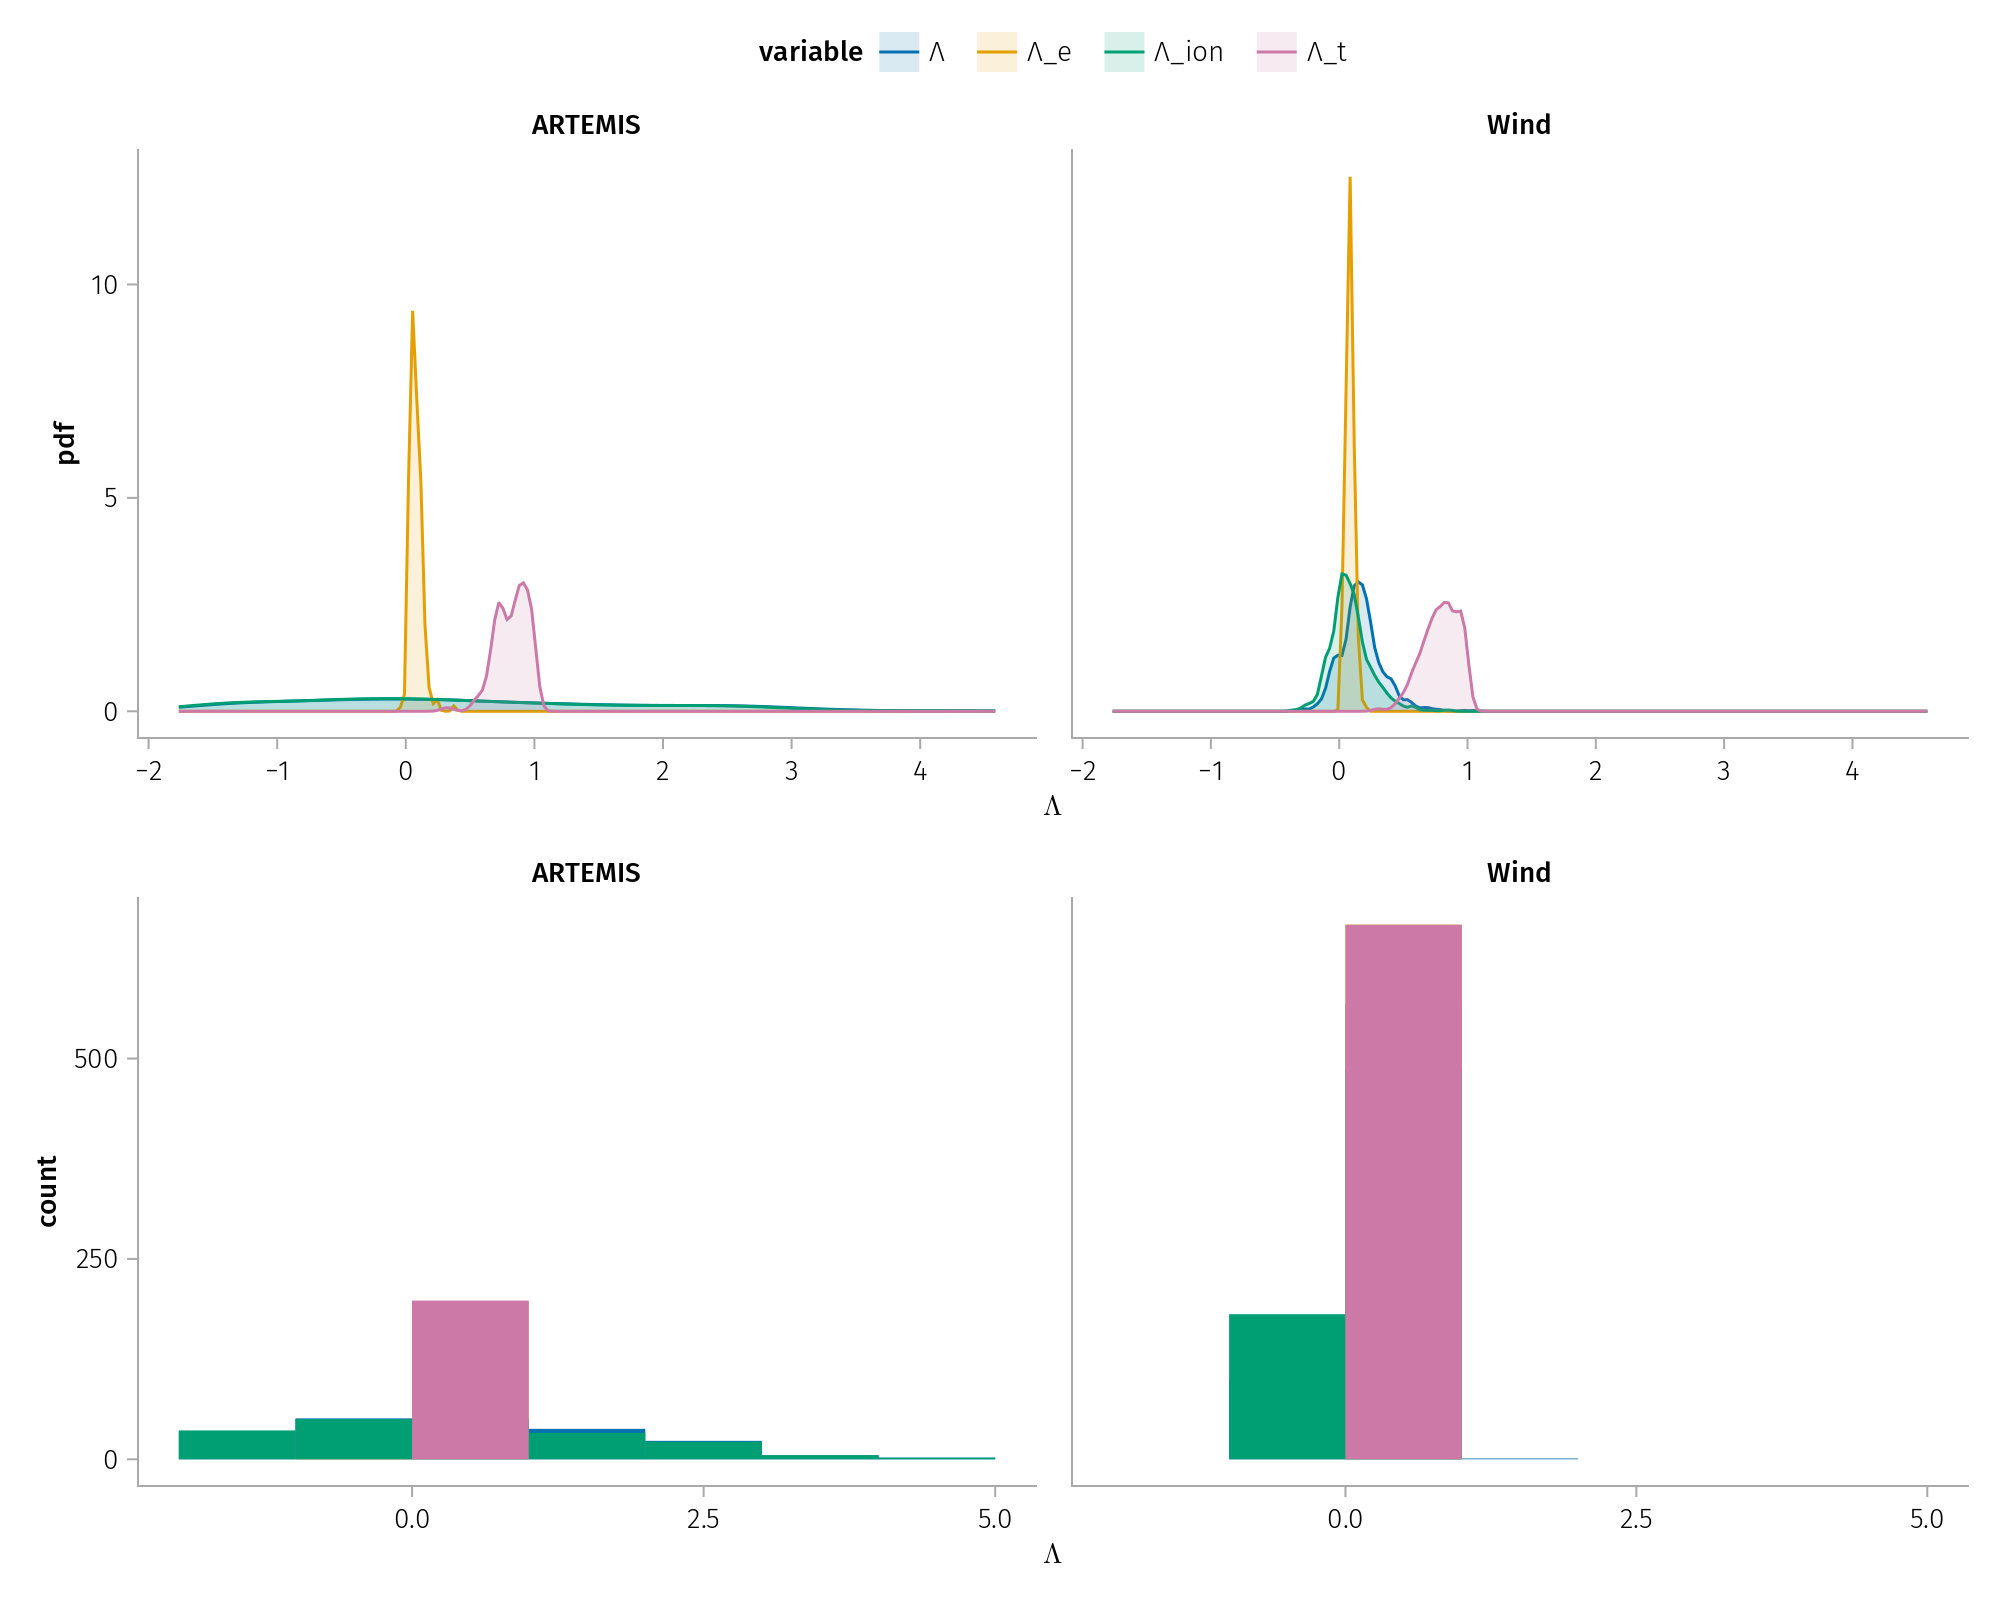

In [173]:
#| label: fig-anisotropy-comp
#| column: screen
plot_anistropy_comparison()

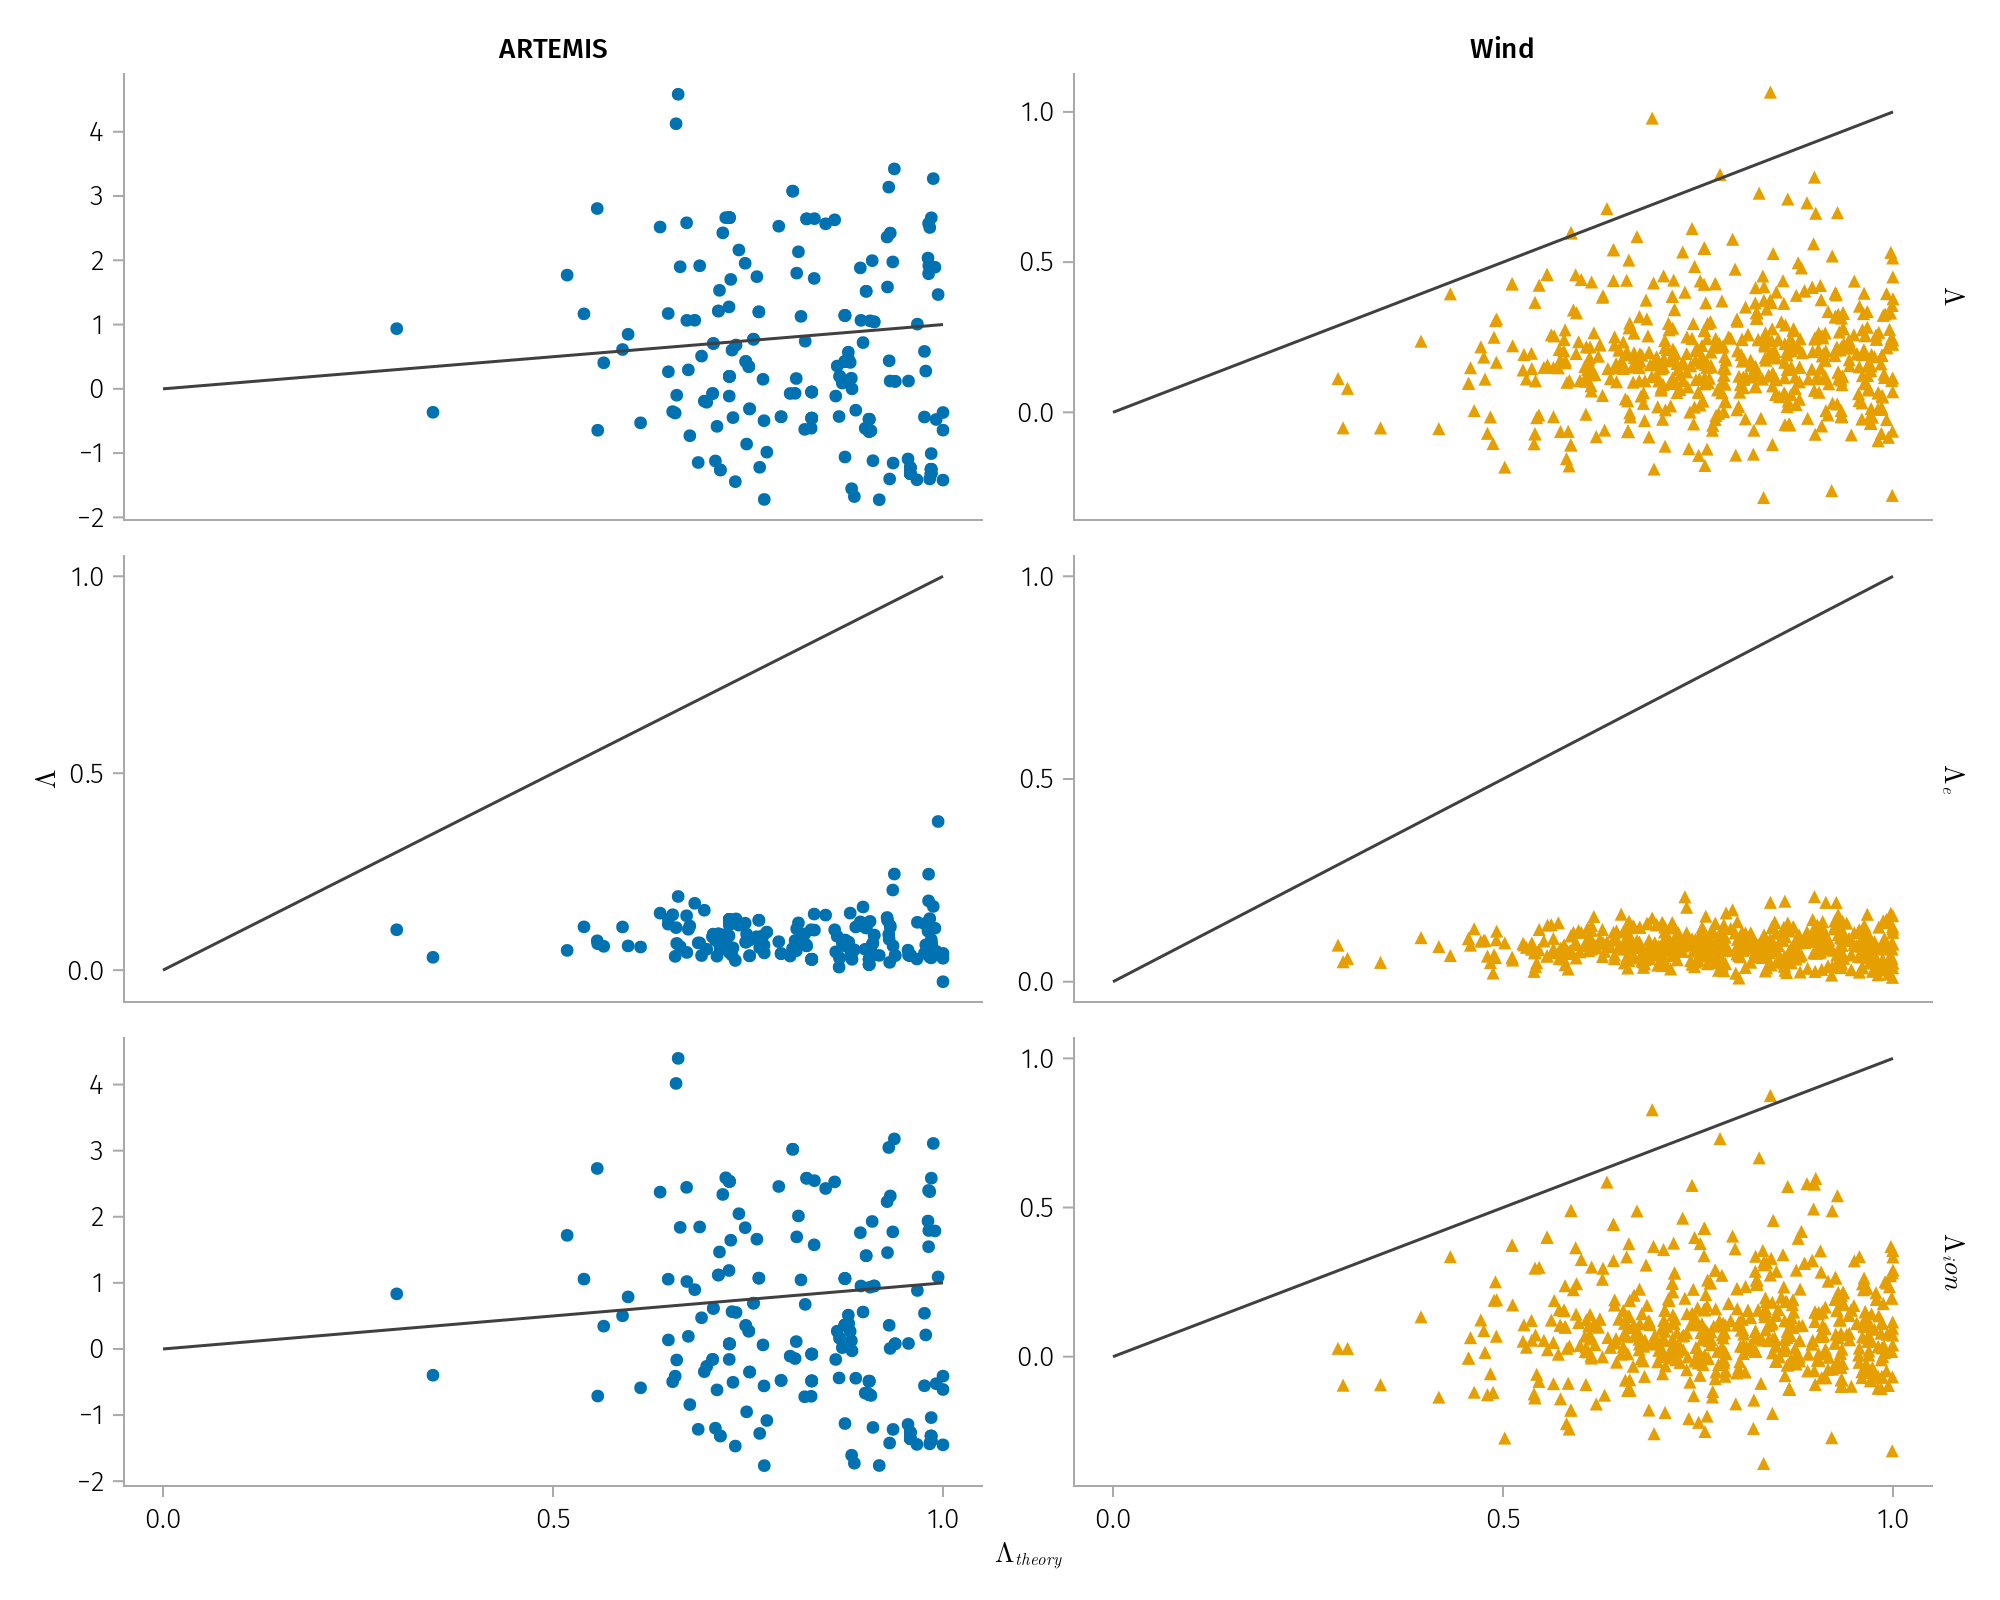

In [240]:
#| label: fig-anisotropy-comp-2d
#| column: screen
plot_anistropy_comparison_2d()

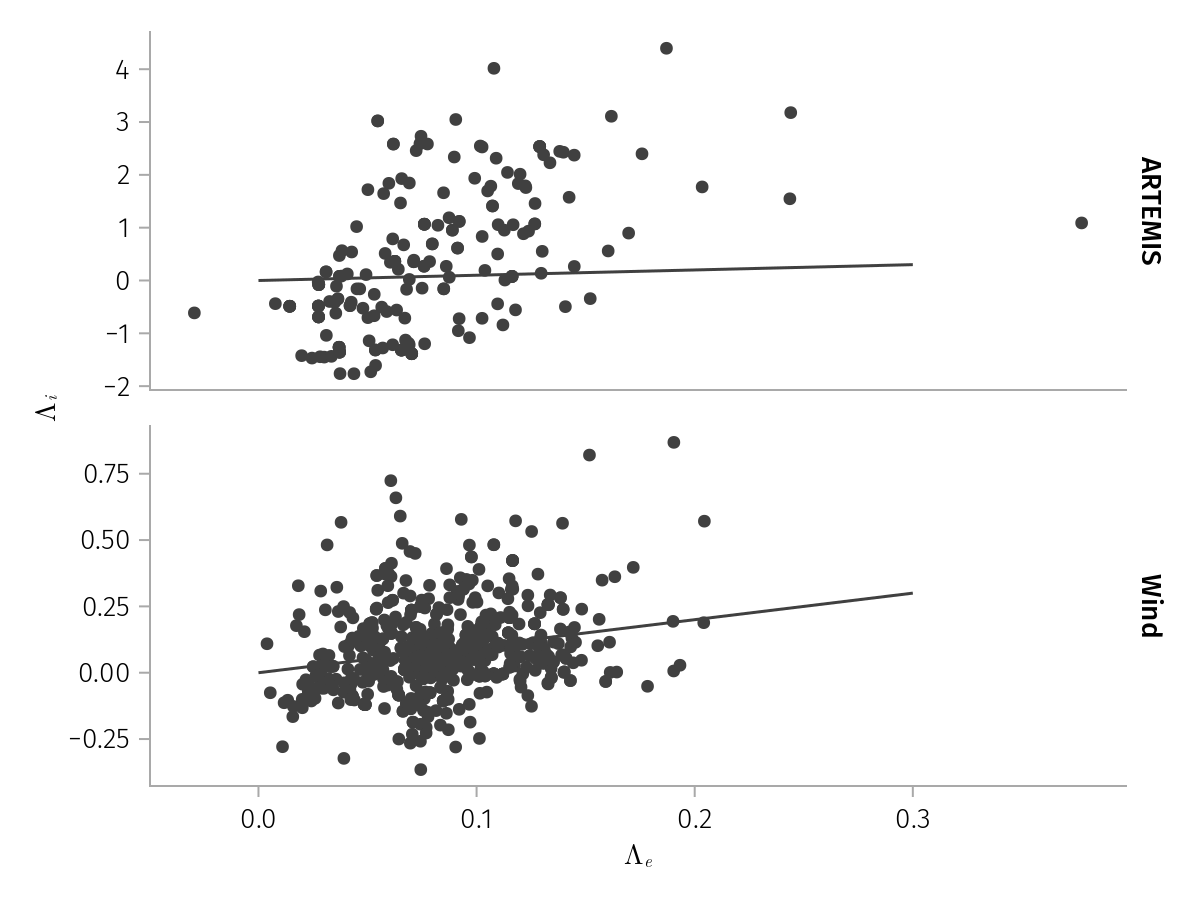

In [250]:
#| label: fig-anisotropy-comp-i-e
#| column: screen
plot_anistropy_comparison_i_e()